# Исследование объявлений о продаже квартир

Данные: сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. 

Задачи: Установить параметры для оценки рыночной стоимости объектов недвижимости. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Шаг 1. Откройте файл с данными и изучите общую информацию. 

In [2]:
import pandas
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [3]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t', decimal='.')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

In [4]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


#### Описание данных
- airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
- balcony — число балконов
- ceiling_height — высота потолков (м)
- cityCenters_nearest — расстояние до центра города (м)
- days_exposition — сколько дней было размещено объявление (от публикации до снятия)
- first_day_exposition — дата публикации
- floor — этаж
- floors_total — всего этажей в доме
- is_apartment — апартаменты (булев тип)
- kitchen_area — площадь кухни в квадратных метрах (м²)
- last_price — цена на момент снятия с публикации
- living_area — жилая площадь в квадратных метрах(м²)
- locality_name — название населённого пункта
- open_plan — свободная планировка (булев тип)
- parks_around3000 — число парков в радиусе 3 км
- parks_nearest — расстояние до ближайшего парка (м)
- ponds_around3000 — число водоёмов в радиусе 3 км
- ponds_nearest — расстояние до ближайшего водоёма (м)
- rooms — число комнат
- studio — квартира-студия (булев тип)
- total_area — площадь квартиры в квадратных метрах (м²)
- total_images — число фотографий квартиры в объявлении

### Вывод

Описание данных:

В таблице 22 столбцов и 23699 строк.

Неслучайный ли смешанный характер пропусков, столбцы:
- airports_nearest
- cityCenters_nearest	
- parks_around3000	
- parks_nearest	
- ponds_around3000	
- ponds_nearest	
- days_exposition
- locality_name

(получают автоматически на основе картографических данных, стоит сообщить об этом в отдел занимающийся выгрузкой данных)

Случайный характер пропусков, столбцы:
 - ceiling_height
 - floors_total
 -  living_area
 - is_apartment
 - kitchen_area
 - balcony
 

### Шаг 2. Предобработка данных

In [5]:
#меняем название столбцов
data.set_axis(['total_images', 'last_price', 'total_area', 'first_day_exposition', 'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor', 'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony', 'locality_name', 'airports_nearest', 'city_centers_nearest', 'parks_around_3K', 'parks_nearest', 'ponds_around_3K', 'ponds_nearest', 'days_exposition'], axis = 'columns', inplace = True)

In [6]:
data.info(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
city_centers_nearest    18180 non-null float64
parks_around_3K         18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around_3K

#### first_day_exposition — дата публикации

In [7]:
# переводит дату в формат времени
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

#### locality_name — название населённого пункта

In [8]:
#удаляем пустые значения nan
data.dropna(subset = ['locality_name'], inplace = True) 

#### ceiling_height — высота потолков (м)

In [9]:
#заполняем пустые значения медианой
for locality_type in data['locality_name'].unique(): 
    median_height = data[data['locality_name'] == locality_type]['ceiling_height'].median()
    data.loc[(data['ceiling_height'].isna())&(data['locality_name'] == locality_type), 'ceiling_height'] =  median_height

#заполняем оставшиеся пустые значения медианой
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median()) 

/opt/conda/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1113: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


#### is_apartment — апартаменты (булев тип)

In [10]:
#заполняем пустые ячейки 0
data['is_apartment'] = data['is_apartment'].fillna(0) 
#заполняем  True yf 1
data['is_apartment'] = data['is_apartment'].replace(True, '1')
#приводим к булеву типу
data['is_apartment'] = data['is_apartment'].astype('bool')

#### floors_total — всего этажей в доме

In [11]:
pd.to_numeric(data['floors_total'])#строки на вещественные числа
data.dropna(subset = ['floors_total'], inplace = True)#удаляем пустые значения
data['floors_total'] = data['floors_total'].astype('int')#переводим из вещественных в целые

#### living_area — жилая площадь в квадратных метрах(м²)

In [12]:
#заполняем пустые ячейки коэффициентом living_area/total_area
k_living_total = data['living_area'].median()/data['total_area'].median() 

In [13]:
data['living_area'] = data['living_area'].fillna(k_living_total)

#### kitchen_area — площадь кухни в квадратных метрах (м²)

In [14]:
#заполняем пустые ячейки коффициентом kitchen_area/total_area
k_kitchen_total = data['kitchen_area'].median()/data['total_area'].median() 
data['kitchen_area'] = data['kitchen_area'].fillna(k_kitchen_total)

#### balcony — число балконов

In [15]:
data['balcony'] = data['balcony'].fillna(0) #заполняем пустые ячейки 0
pd.to_numeric(data['balcony'])#строки на вещественные числа
data['balcony'] = data['balcony'].astype('int')#переводим из вещественных в целые

#### airports_nearest — расстояние до ближайшего аэропорта в метрах (м)

In [16]:
#заполняем пустые значения медианой c данными в нас. пунктах
for locality_type in data['locality_name'].unique(): 
    
    median_nearest = data[data['locality_name'] == locality_type]['airports_nearest'].median()
    data.loc[(data['airports_nearest'].isna())&(data['locality_name'] == locality_type), 'airports_nearest'] =  median_nearest

#### cityCenters_nearest — расстояние до центра города (м)

In [17]:
#заполняем пустые значения медианой c данными в нас. пунктах
for locality_type in data['locality_name'].unique(): 
    
    median_nearest = data[data['locality_name'] == locality_type]['city_centers_nearest'].median()
    data.loc[(data['city_centers_nearest'].isna())&(data['locality_name'] == locality_type), 'city_centers_nearest'] =  median_nearest

#### parks_around3000 — число парков в радиусе 3 км

Если дааных нет, то скорее всего в этом радиусе нет парков прудов и пропуски можно заполнить 0

In [18]:

data['parks_around_3K'] = data['parks_around_3K'].fillna(0)
pd.to_numeric(data['parks_around_3K'])#строки на вещественные числа
#data.dropna(subset = ['floors_total'], inplace = True)#удаляем пустые значения
data['parks_around_3K'] = data['parks_around_3K'].astype('int')#переводим из вещественных в целые

#### ponds_around3000 — число водоёмов в радиусе 3 км

In [19]:
data['ponds_around_3K'] = data['ponds_around_3K'].fillna(0)
pd.to_numeric(data['ponds_around_3K'])#строки на вещественные числа
#data.dropna(subset = ['floors_total'], inplace = True)#удаляем пустые значения
data['ponds_around_3K'] = data['ponds_around_3K'].astype('int')#переводим из вещественных в целые

#### days_exposition — сколько дней было размещено объявление (от публикации до снятия)

Строки в которых нет данных наиболее корректно заполнить количество дней от опубликования объявления до дня выгрузки данных

In [20]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'])

data['days_exposition_new'] = (datetime.now() - data['first_day_exposition']).dt.days

data.loc[~data['days_exposition'].isna(), 'days_exposition_new'] = data.loc[~data['days_exposition'].isna(), 'days_exposition']
#data[['first_day_exposition', 'days_exposition_new', 'days_exposition']]
data.head(10)
data['days_exposition_new'] = data['days_exposition_new'].astype('int')

In [21]:
data.duplicated().sum() #проверка на дубликаты

0

### Вывод

Заменены пропуски и изменены типы данных в столбцах:
- airports_nearest
- cityCenters_nearest	
- parks_around3000	
- parks_nearest	
- ponds_around3000	
- ponds_nearest	
- days_exposition
- locality_name
- ceiling_height
- floors_total
-  living_area
- is_apartment
- kitchen_area
- balcony

### Шаг 3. Посчитайте и добавьте в таблицу

Цена квадратного метра:

In [22]:
data['price_square_meter'] = data['last_price']/data['total_area']

День недели, месяц и год публикации объявления:

In [23]:
data['weekday_exposition'] = data['first_day_exposition'].dt.weekday
data['month_exposition'] = data['first_day_exposition'].dt.month
data['year_exposition'] = data['first_day_exposition'].dt.year

Этаж квартиры; варианты — первый, последний, другой:

In [24]:
def type_floor (row):
    
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'
    
data['type_floor'] = data[['floor', 'floors_total']].apply(type_floor, axis = 1)

Соотношение жилой и общей площади, а также отношение площади кухни к общей:

In [25]:
data['k_living_total'] = data['living_area']/data['total_area']

In [26]:
data['k_kitchen_total'] = data['kitchen_area']/data['total_area']

### Вывод

Данные рассчитаны и добавлены в таблицу

### Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:

 - ###  Получаем гистограммы для параметров: площадь, цена, число комнат, высота потолков.

##### Площадь:

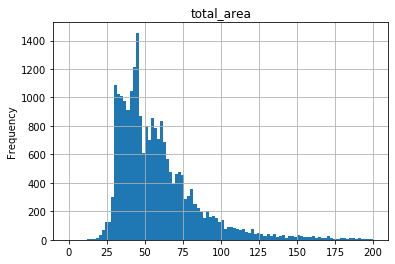

In [27]:
data['total_area'].plot( kind = 'hist', bins = 100, title = 'total_area', range = (0, 200), grid = True)
plt.show()

Площадь квартир имеет распределение Пуассона с пиком в 45 кв.м. Основная масса чисел лежит в промежутке от 25 до 125 кв.м.

##### Цена:

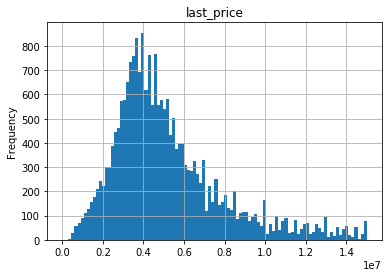

In [28]:
data['last_price'].plot( kind = 'hist', bins = 100, title = 'last_price', range = (0, 15000000), grid = True)
plt.show()

Цена квартир имеет распределение с пиком в 3,5 млн. Основная масса цен лежит в промежутке от 50 до 1, 4 млн.

##### Число комнат:

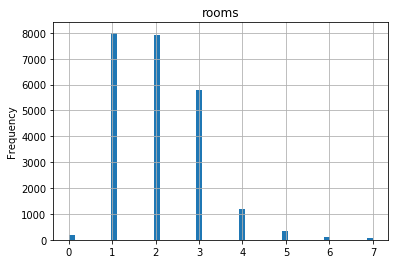

In [29]:
data['rooms'].plot( kind = 'hist', bins = 50, title = 'rooms', range = (0, 7), grid = True)
plt.show()

Наиболее популярные это однокомнатные и двухкомнатные квартиры, далее идут трёхкомнатные.

##### Высота потолков:

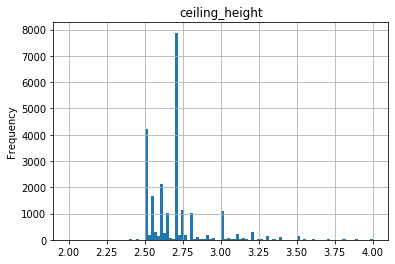

In [30]:
data['ceiling_height'].plot( kind = 'hist', bins = 100, title = 'ceiling_height', range = (2, 4), grid = True)
plt.show()

Наиболее популярный формат потолков это 2,7 м и 2,5 м

 - ###  Изучаем время продажи квартиры

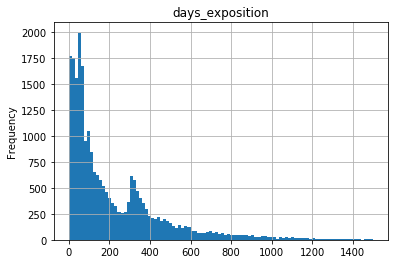

In [31]:
data['days_exposition_new'].plot( kind = 'hist', bins = 100, title = 'days_exposition',  range = (0, 1500), grid = True)
plt.show()

In [32]:
stat_days_exp = data['days_exposition_new'].describe()

print("Среднее время продажи квартиры:{:5.0f} дня".format(stat_days_exp[1]))
print("Медианное время продажи квартиры:{:5.0f} дня".format(stat_days_exp[5]))

Среднее время продажи квартиры:  225 дня
Медианное время продажи квартиры:  124 дня


In [33]:
quart = data['days_exposition_new'].describe()
iqr = (float(quart[6])-float(quart[4]))*1.5
quart_25 = float(quart[4]) - iqr
quart_75 = float(quart[6]) + iqr


print('Верхний полуторный квартиль',quart_75)

Верхний полуторный квартиль 745.0


Анализируя гисстограмму распределения можно считать аномальными значениями длительности продажи больше 740 дней.

Исходя из длительности бюрократических процедур при покупке жилья, минимальный срок стоит взять по границы в один месяц (30 дней).

 - ###  Убираем редкие и выбивающиеся значения

Убирать все аномальные значения нет смысла, можно лишиться множества важных данных. Потому был составлен список наиболее важных параметров для рассчёта рыночной стоимости недвижимости:
- цента квартиры
- общая площадь
- высота потолков
- время продажи квартиры
- количество комнат
- стоимость квадратного метра
- соотношение жилой площади к общей
- соотоношение площади кухни к общей площади

In [34]:
data_q = data

#создаём список для фильтрации данных
columns_select = ['last_price','total_area', 'floors_total', 'ceiling_height', 'days_exposition_new', 'k_living_total', 'k_kitchen_total', 'rooms']

#цикл для фильтрации
for name in columns_select:       
    quart = data[name].describe()
    iqr = (float(quart[6])-float(quart[4]))*1.5
    quart_25 = float(quart[4]) - iqr
    quart_75 = float(quart[6]) + iqr
    data_q = data_q.query('@quart_25 <= {0} <= @quart_75'.format(name))
    #print(name, data_q.shape)


Получаем новые гистограммы распределения

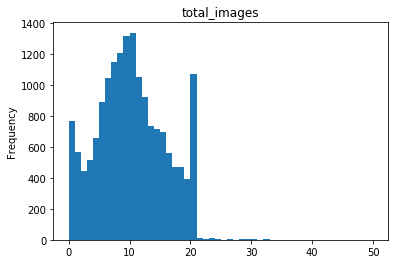

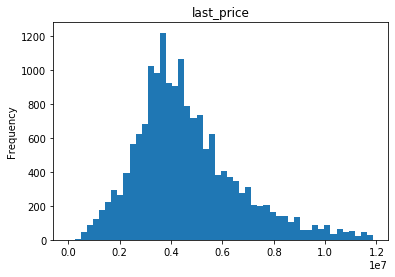

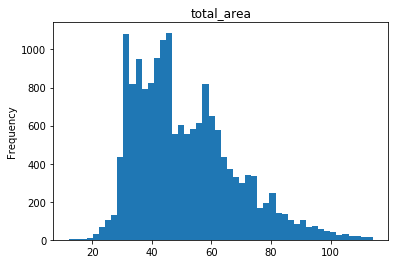

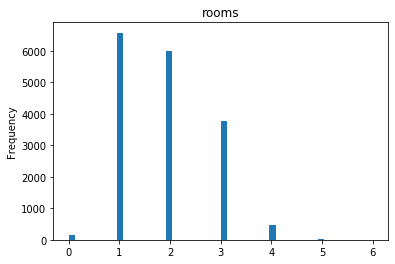

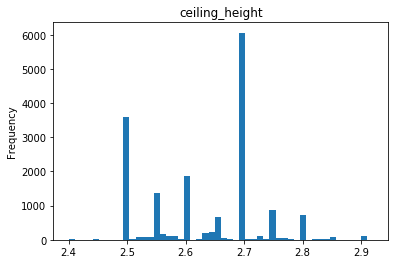

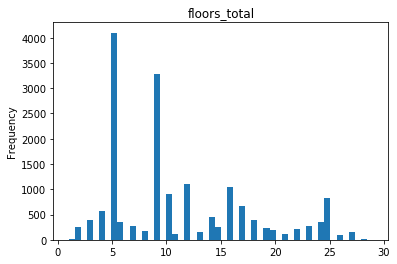

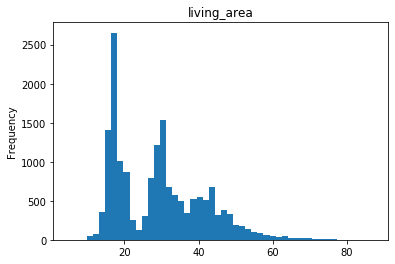

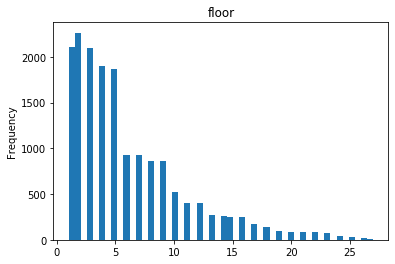

<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


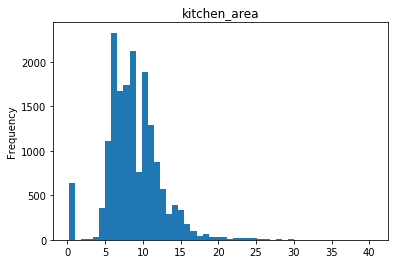

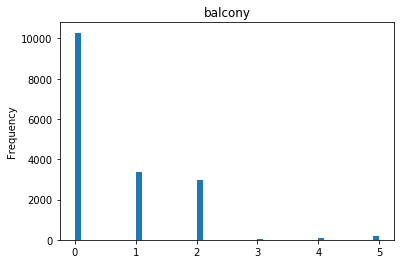

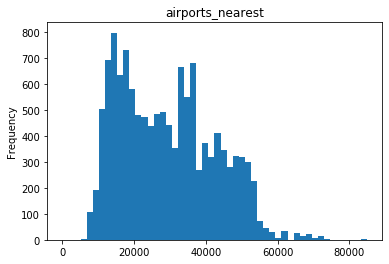

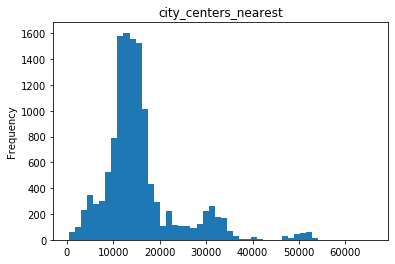

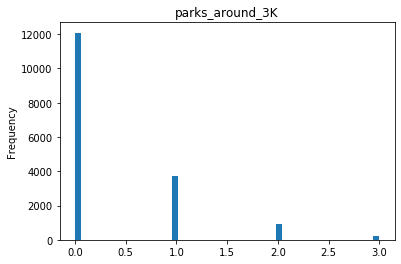

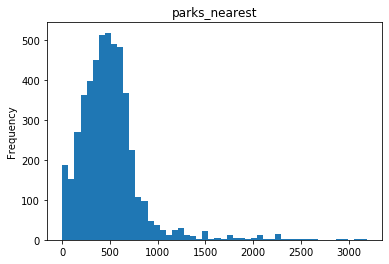

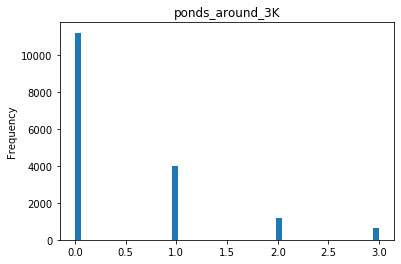

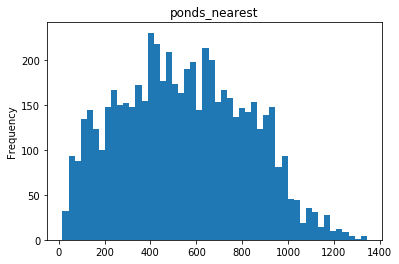

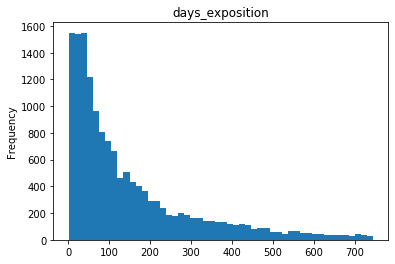

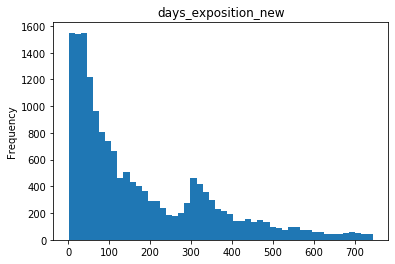

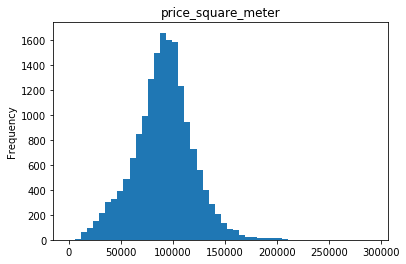

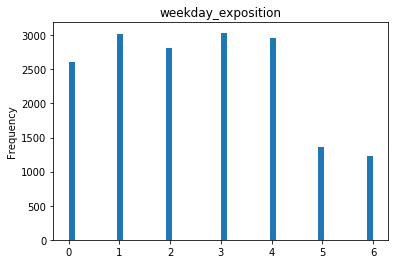

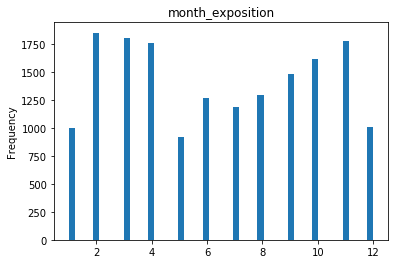

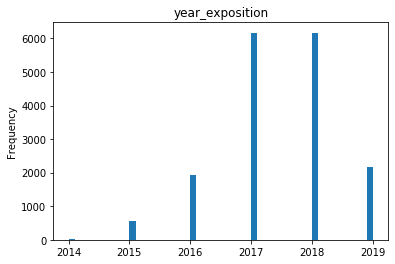

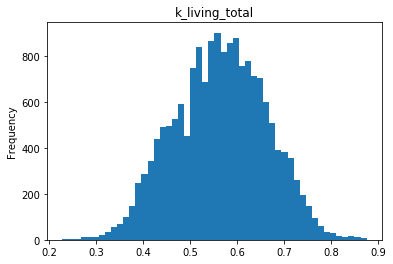

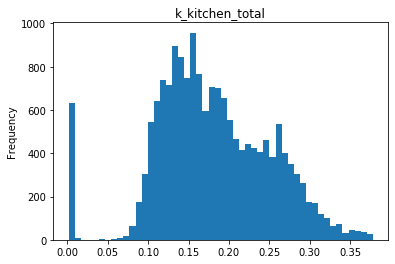

In [35]:
for name in data.columns:
    try: 
        data_q[name].plot( kind = 'hist', bins = 50, title = name)
        plt.show()
    except:
        continue

 - #### Факторы больше всего влияют на стоимость квартиры

In [36]:
value_corr = data_q.corr()

value_corr['last_price'].sort_values(ascending = False).head(10)

last_price            1.000000
total_area            0.687698
price_square_meter    0.616201
living_area           0.553456
kitchen_area          0.473837
rooms                 0.430919
ceiling_height        0.334717
floors_total          0.293118
ponds_around_3K       0.235033
floor                 0.196051
Name: last_price, dtype: float64

На стоимость квартиры больше всего влияют:
- жилая площадь
- общая площадь
- количество комнат
- стоимость квадратного метра
- площадь кухни

##### Зависимость стоимости квартиры от параметров:

In [37]:
corr_data = data_q.corr()

print("Площадь квартиры в квадратных метрах (м²) - k{:5.2f} зависимость есть".format(corr_data.loc['total_area','last_price']))

Площадь квартиры в квадратных метрах (м²) - k 0.69 зависимость есть


In [38]:
print("Число комнат - k{:5.2f} зависимость есть".format(corr_data.loc['rooms','last_price']))

Число комнат - k 0.43 зависимость есть


In [39]:
print("Удалённости от центра - k{:5.2f} небольшая обратная зависимость".format(corr_data.loc['city_centers_nearest','last_price']))

Удалённости от центра - k-0.31 небольшая обратная зависимость


##### Типы этажаей:

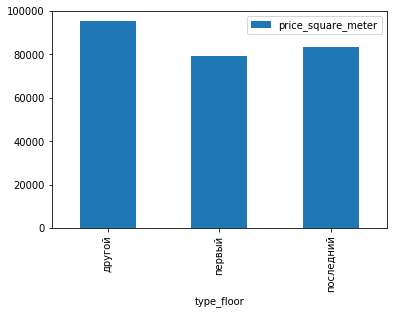

In [40]:
data_q.pivot_table(index = 'type_floor', values = 'price_square_meter', aggfunc = 'median').reset_index().plot(
    
kind = 'bar', x = 'type_floor'
)
plt.show()

Первые этажи - самые дешёвые; последние этажи - средняя цена, самые дорогие - промежуточные этажи

##### Зависимость от дня недели

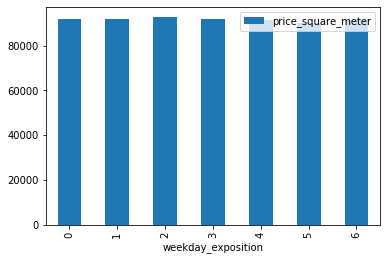

In [41]:
data_q.pivot_table(index = 'weekday_exposition', values = 'price_square_meter', aggfunc = 'median').reset_index().plot(
    
kind = 'bar', x = 'weekday_exposition'
)
plt.show()

Самые дорогие объявления о продаже появляются в среду, дешёвые в субботу. В целом изменчивость в течении недели незначительная.

##### Зависимость от месяца

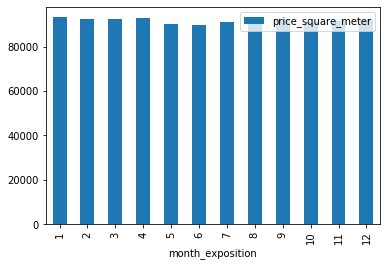

In [42]:
data_q.pivot_table(index = 'month_exposition', values = 'price_square_meter', aggfunc = 'median').reset_index().plot(
    
kind = 'bar', x = 'month_exposition'
)
plt.show()

Изменчивость в течении года не значительная. Самая высокая цена в течении года наблюдается в январе, самая низкая в мае.

##### Зависимость от года

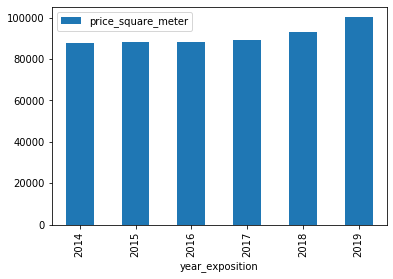

In [43]:
data_q.pivot_table(index = 'year_exposition', values = 'price_square_meter', aggfunc = 'median').reset_index().plot(
    
kind = 'bar', x = 'year_exposition'
)
plt.show()

С 2014 года наблюдается ежегодный рост стоимости жилья, наибольшие темпы роста пошли с 2017 года.

 - ### ТОП-10 населённых пунктов с наибольшим числом объявлений

In [44]:
data_q.groupby('locality_name').agg({'price_square_meter':['count', 'mean']}).sort_values(by = [('price_square_meter', 'count')] , ascending = False).head(10)

price_square_meter               
                               count           mean
locality_name                                      
Санкт-Петербург                10704  104223.124358
посёлок Мурино                   420   86068.341621
посёлок Шушары                   380   78224.080087
Всеволожск                       328   66871.593500
Колпино                          300   75159.477649
посёлок Парголово                279   89660.531922
Пушкин                           252   99916.176194
Гатчина                          251   68056.218836
деревня Кудрово                  233   93010.609400
Петергоф                         170   82700.675551

Из ТОП-10 по количеству объявлений, самая высокая стоимость жилья в Санкт-Петербурге, самая низкая в Петергофе

 - ### Предложения квартир в Санкт-Петербурге

In [45]:
#фильтруем данные по Санкт-Птербургу
data_spb = data_q.query('locality_name == "Санкт-Петербург"')
#переводим расстояние в километры
data_spb['city_centers_nearest_km'] = data_spb['city_centers_nearest']/1000
#переводим в целые числа
data_spb['city_centers_nearest_km'] = data_spb['city_centers_nearest_km'].astype('int')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


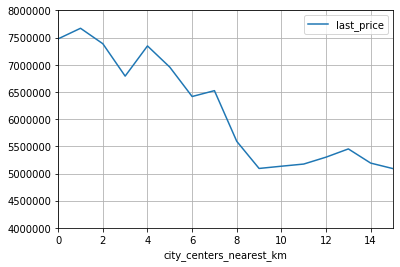

In [46]:
##### Создаём график зависимости средней цены квариры и её удалённости от центра
data_spb.pivot_table(index = 'city_centers_nearest_km', values = 'last_price', aggfunc = 'mean').reset_index().plot(

x='city_centers_nearest_km', y='last_price', xlim =(0, 15), ylim =(4000000, 8000000), grid = True
)
plt.show()


In [47]:
data_spb.pivot_table(index = 'city_centers_nearest_km', values = 'last_price', aggfunc = 'mean')

,last_price
city_centers_nearest_km,
0,7.477950e+06
1,7.672190e+06
2,7.387755e+06
3,6.792135e+06
4,7.347251e+06
5,6.957052e+06
6,6.416878e+06
7,6.524644e+06
8,5.592207e+06


Резкая изменчивость графика с 3 до 4 км, говорит о том что центральная часть заканчивается на границе 3 км. Пик на 4 км скорее всего говорит о наличии премиального сегмента жилья в районе Крестовского острова (приблизительно 4 км от центра).

 - #### Сегмент квартир в центре Санкт- Петербурга

In [48]:
data_spb_3km = data_spb.query('city_centers_nearest_km <= 3')

In [49]:
def ceneter(row):
    if row <= 3:
        return 'центр'
    else:
        return 'не в центре'

data_spb['is_center'] = data_spb['city_centers_nearest_km'].apply(ceneter)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


##### Площадь:

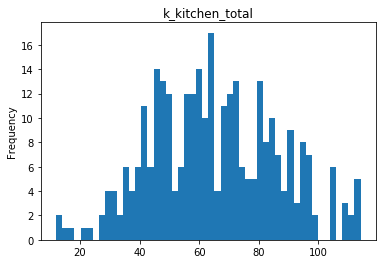

In [50]:
data_spb_3km['total_area'].plot( kind = 'hist', bins = 50, title = name)
plt.show()

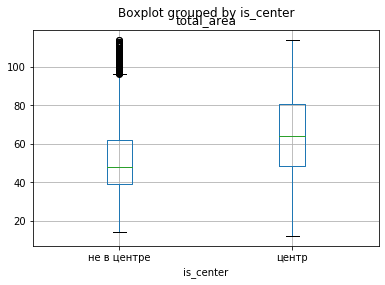

In [51]:
data_spb.boxplot( 'total_area',by = 'is_center')

В среднем площадь квартир в центре выше. 

##### Цена:

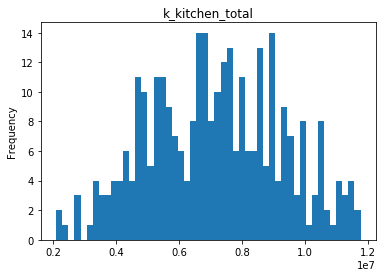

In [52]:
data_spb_3km['last_price'].plot( kind = 'hist', bins = 50, title = name)
plt.show()

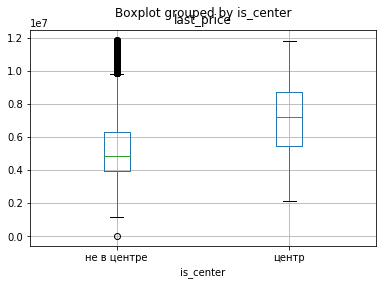

In [53]:
data_spb.boxplot( 'last_price',by = 'is_center')

Всё логично, цена квартир в центре города выше

##### Число комнат:

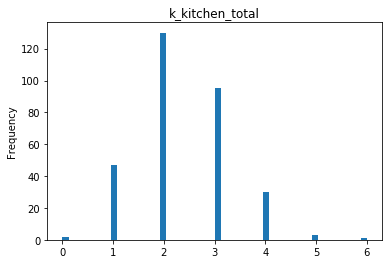

In [54]:
data_spb_3km['rooms'].plot( kind = 'hist', bins = 50, title = name)
plt.show()

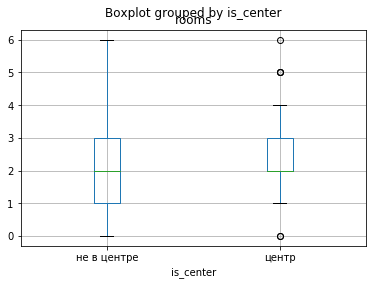

In [55]:
data_spb.boxplot('rooms',by = 'is_center')

Самые популярные и в центре и на окраине двухкомнатные квартиры, хотя разброс предложений на окраине выше.

##### Высота потолков:

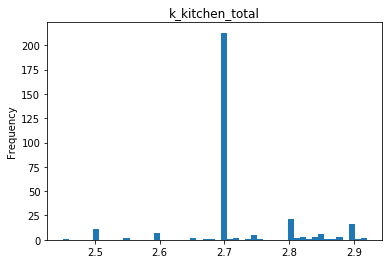

In [56]:
data_spb_3km['ceiling_height'].plot( kind = 'hist', bins = 50, title = name)
plt.show()

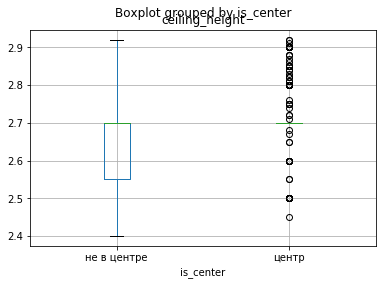

In [57]:
data_spb.boxplot('ceiling_height',by = 'is_center')

И в центре и на окраине наиболее популярны потолки высотой 2,7 м

#### Корреляция с ценой:

Число комнат

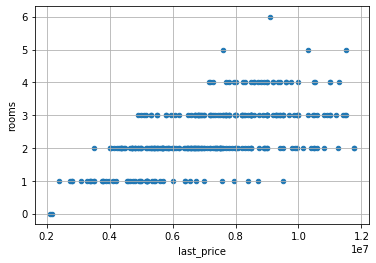

In [58]:
data_spb_3km.plot(x='last_price', y='rooms', kind='scatter', alpha=1, grid = True)

Общая площадь:

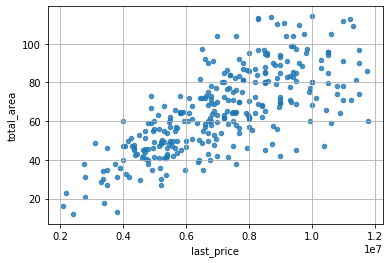

In [59]:
data_spb_3km.plot(x='last_price', y='total_area', kind='scatter', alpha=0.8, grid = True)

Жилая площадь:

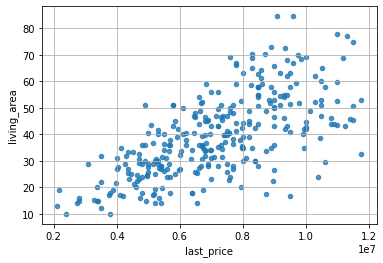

In [60]:
data_spb_3km.plot(x='last_price', y='living_area', kind='scatter', alpha=0.8, grid = True)


Площадь кухни:

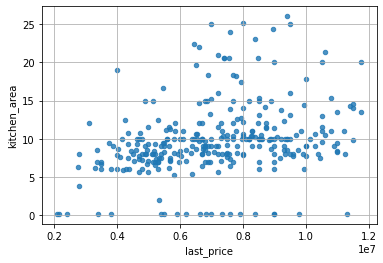

In [61]:
data_spb_3km.plot(x='last_price', y='kitchen_area', kind='scatter', alpha=0.8, grid = True)

#### Наиболее значимые параметры для центральной части города:

In [62]:
spb_corr_3km = data_spb_3km.corr()

spb_corr_3km['last_price'].sort_values(ascending = False).head(10)

last_price            1.000000
total_area            0.728124
living_area           0.669522
rooms                 0.593052
kitchen_area          0.297267
price_square_meter    0.178645
floor                 0.131077
total_images          0.118350
ceiling_height        0.097251
year_exposition       0.095977
Name: last_price, dtype: float64

#### Наиболее значимые параметры для периферии и области:

In [63]:
spb_corr = data_spb.corr()

spb_corr['last_price'].sort_values(ascending = False).head(10)

last_price            1.000000
total_area            0.796653
living_area           0.648582
kitchen_area          0.522868
rooms                 0.497203
price_square_meter    0.392800
ceiling_height        0.262599
floors_total          0.204560
total_images          0.158220
floor                 0.131918
Name: last_price, dtype: float64

### Вывод

Наиболее важные параметры для определения цены в центральной части горда:

 - общая площадь квартиры
 - жилая площадь квартиры
 - количество комнат
 - площадь кухни
 
Наиболее важные параметры для определения цены в на периферии города и в области:

 - общая площадь квартиры
 - жилая площадь квартиры
 - площадь кухни
 - количество комнат
 - цена за квадратный метр 

### Шаг 5. Общий вывод

Получен датафрейм размером в 23699 строк и 22 столбцов. 

Были выявлены пропуски в столбцах:
- airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
- balcony — число балконов
- ceiling_height — высота потолков (м)
- cityCenters_nearest — расстояние до центра города (м)
- days_exposition — сколько дней было размещено объявление (от публикации до снятия)
- floors_total — всего этажей в доме
- is_apartment — апартаменты (булев тип)
- kitchen_area — площадь кухни в квадратных метрах (м²)
- living_area — жилая площадь в квадратных метрах(м²)
- locality_name — название населённого пункта
- parks_around3000 — число парков в радиусе 3 км
- parks_nearest — расстояние до ближайшего парка (м)
- ponds_around3000 — число водоёмов в радиусе 3 км
- ponds_nearest — расстояние до ближайшего водоёма (м)

В целлом данные достаточно полные, за исключением картографических данных, стоит сообщить об этом в отдел занимающийся выгрузкой данных.

Установлены параметры:

Наиболее важные параметры для определения цены в центральной части горда:

 - общая площадь квартиры
 - жилая площадь квартиры
 - количество комнат
 - площадь кухни
 
 Наиболее важные параметры для определения цены в на переферии города и в области:

 - общая площадь квартиры
 - жилая площадь квартиры
 - площадь кухни
 - количество комнат
 - цена за квадратный метр       